In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("data/graaf_karel_de_goedelaan_per-hour.csv")
df.head()


,instance_id,segment_id,date,interval,uptime,heavy,car,bike,pedestrian,night,...,bike_rgt,pedestrian_lft,pedestrian_rgt,night_lft,night_rgt,direction,car_speed_hist_0to70plus,car_speed_hist_0to120plus,timezone,v85
0,-1,9000009940,2025-11-10T13:00:00.000Z,hourly,0.499722,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.00000,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Europe/Paris,NaN
1,-1,9000009940,2025-11-10T14:00:00.000Z,hourly,0.999167,30.0,6.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.00000,1,"[33.3333333333, 16.6666666667, 0.0, 33.3333333...","[33.3333333333, 0.0, 0.0, 16.6666666667, 0.0, ...",Europe/Paris,65.5
2,-1,9000009940,2025-11-10T15:00:00.000Z,hourly,0.999722,1.0,1.0,16.0,0.0,32.000000,...,2.0,0.0,0.0,14.000000,18.00000,1,"[0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0...",Europe/Paris,39.0
3,-1,9000009940,2025-11-10T16:00:00.000Z,hourly,0.999444,0.0,0.0,0.0,0.0,376.000000,...,0.0,0.0,0.0,107.000000,269.00000,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Europe/Paris,NaN
4,-1,9000009940,2025-11-10T17:00:00.000Z,hourly,0.990278,0.0,0.0,0.0,0.0,146.027682,...,0.0,0.0,0.0,60.532872,85.49481,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Europe/Paris,NaN


In [3]:
df.info()
df.shape
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   instance_id                1363 non-null   int64  
 1   segment_id                 1363 non-null   int64  
 2   date                       1363 non-null   object 
 3   interval                   1363 non-null   object 
 4   uptime                     1363 non-null   float64
 5   heavy                      1363 non-null   float64
 6   car                        1363 non-null   float64
 7   bike                       1363 non-null   float64
 8   pedestrian                 1363 non-null   float64
 9   night                      1363 non-null   float64
 10  heavy_lft                  1363 non-null   float64
 11  heavy_rgt                  1363 non-null   float64
 12  car_lft                    1363 non-null   float64
 13  car_rgt                    1363 non-null   float

instance_id                    0
segment_id                     0
date                           0
interval                       0
uptime                         0
heavy                          0
car                            0
bike                           0
pedestrian                     0
night                          0
heavy_lft                      0
heavy_rgt                      0
car_lft                        0
car_rgt                        0
bike_lft                       0
bike_rgt                       0
pedestrian_lft                 0
pedestrian_rgt                 0
night_lft                      0
night_rgt                      0
direction                      0
car_speed_hist_0to70plus       0
car_speed_hist_0to120plus      0
timezone                       0
v85                          984
dtype: int64

In [4]:
# 1) Just convert the existing date column to datetime
df["datetime"] = pd.to_datetime(df["date"], errors="coerce")  # ISO format, so this should work

df = df.sort_values("datetime")
df[["datetime", "interval", "car", "bike", "pedestrian"]].head()


,datetime,interval,car,bike,pedestrian
0,2025-11-10 13:00:00+00:00,hourly,0.0,0.0,0.0
1,2025-11-10 14:00:00+00:00,hourly,6.0,0.0,0.0
2,2025-11-10 15:00:00+00:00,hourly,1.0,16.0,0.0
3,2025-11-10 16:00:00+00:00,hourly,0.0,0.0,0.0
4,2025-11-10 17:00:00+00:00,hourly,0.0,0.0,0.0


2025-11-10 13:00:00+00:00 2026-01-06 07:00:00+00:00


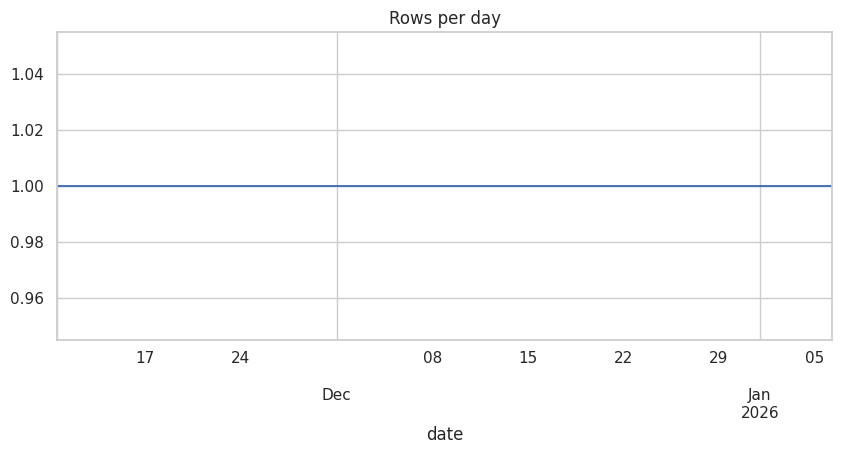

In [5]:
df["date"] = pd.to_datetime(df["date"])
print(df["date"].min(), df["date"].max())

# Count rows per day
daily_counts = df.groupby("date").size()
daily_counts.describe()
daily_counts.plot(kind="line", figsize=(10,4), title="Rows per day")
plt.show()


In [6]:
df["v85"].isnull().mean()

# For now, we keep v85 but know it is very incomplete.


np.float64(0.7219369038884813)

In [7]:
num_cols = ["heavy","car","bike","pedestrian"]
df[num_cols].describe()


,heavy,car,bike,pedestrian
count,1363.000000,1363.000000,1363.000000,1363.000000
mean,1.542858,0.813095,0.363497,2.350155
std,4.882992,2.838570,2.047941,8.492152
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.777157,0.500278,0.000000,0.000000
max,77.000000,40.000000,52.028905,94.503335


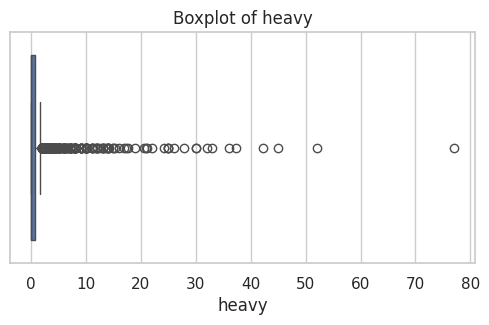

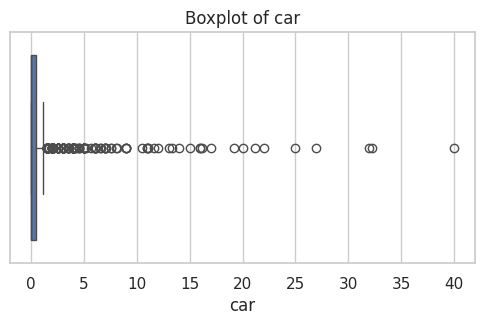

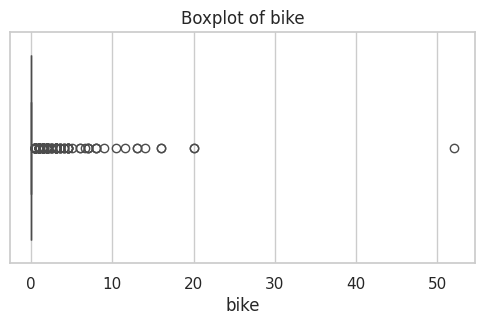

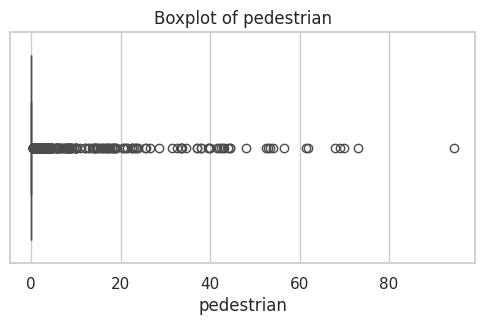

In [8]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


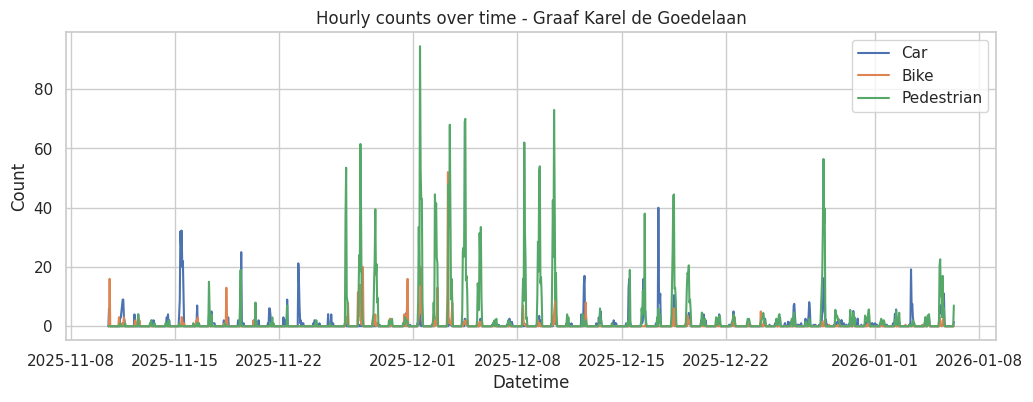

In [9]:
plt.figure(figsize=(12,4))
plt.plot(df["datetime"], df["car"], label="Car")
plt.plot(df["datetime"], df["bike"], label="Bike")
plt.plot(df["datetime"], df["pedestrian"], label="Pedestrian")
plt.legend()
plt.title("Hourly counts over time - Graaf Karel de Goedelaan")
plt.xlabel("Datetime")
plt.ylabel("Count")
plt.show()


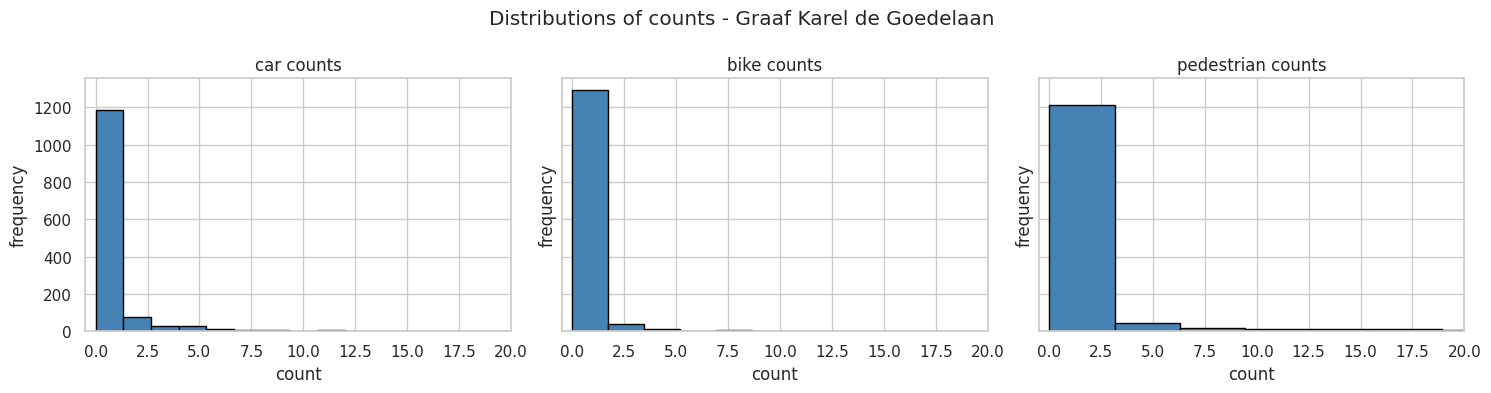

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15,4), sharey=True)

cols = ["car", "bike", "pedestrian"]

for ax, col in zip(axes, cols):
    ax.hist(df[col], bins=30, color="steelblue", edgecolor="black")
    ax.set_title(f"{col} counts")
    ax.set_xlabel("count")
    ax.set_ylabel("frequency")
    ax.set_xlim(-0.5, 20)  # zoom on 0–20 to see shape better

plt.suptitle("Distributions of counts - Graaf Karel de Goedelaan")
plt.tight_layout()
plt.show()


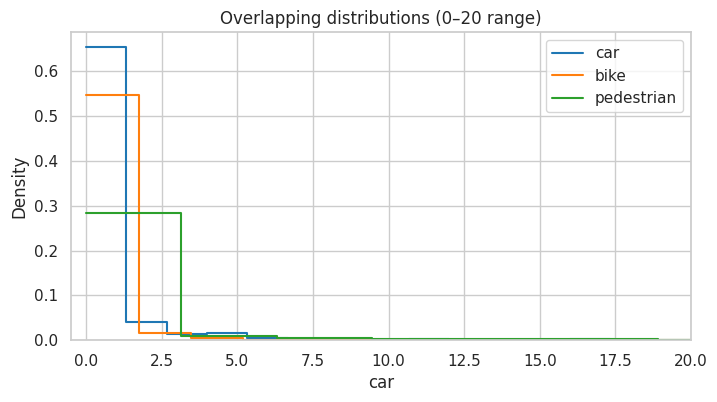

In [11]:
plt.figure(figsize=(8,4))
for col, color in zip(cols, ["tab:blue", "tab:orange", "tab:green"]):
    sns.histplot(df[col], bins=30, stat="density", element="step", fill=False,
                 label=col, color=color)
plt.xlim(-0.5, 20)
plt.legend()
plt.title("Overlapping distributions (0–20 range)")
plt.show()


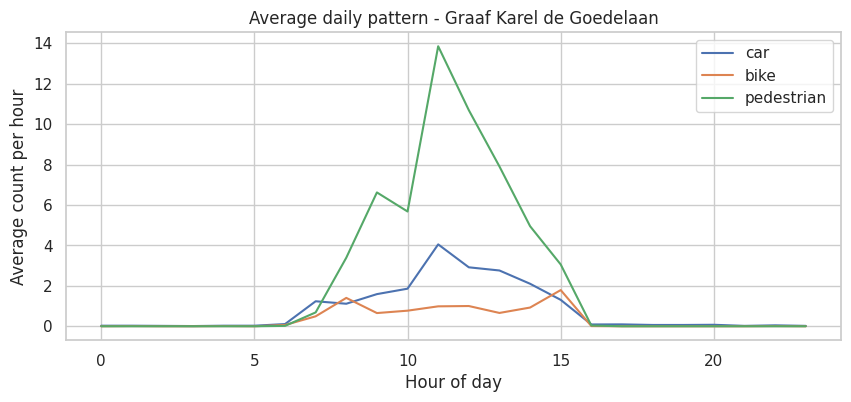

In [12]:
df["hour"] = df["datetime"].dt.hour

avg_by_hour = df.groupby("hour")[["car", "bike", "pedestrian"]].mean()

plt.figure(figsize=(10,4))
for col in ["car", "bike", "pedestrian"]:
    plt.plot(avg_by_hour.index, avg_by_hour[col], label=col)
plt.xlabel("Hour of day")
plt.ylabel("Average count per hour")
plt.title("Average daily pattern - Graaf Karel de Goedelaan")
plt.legend()
plt.show()
